#ДЗ №1. Современный перенос обучения

##Задание №1.
Скачать нейросети ResNet и написать короткую процедуру для предсказания класса изображения

In [1]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

Загрузка модели ResNet
Импортируруем необходимые модули и загружаем предобученную модель ResNet. В данном примере используется ResNet-18:

In [10]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import json
import urllib

# Загрузка предобученной модели ResNet-18
model = models.resnet18(pretrained=True)
model.eval()  # Перевод модели в режим оценки

url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
filename = 'imagenet_classes.txt'
urllib.request.urlretrieve(url, filename)

# Загрузка меток классов в список
with open(filename) as f:
    labels = [line.strip() for line in f.readlines()]


Предобработка изображения

In [ ]:
# Определение трансформаций для изображения
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Загрузка и предобработка изображения
img_path = 'path_to_your_image.jpg'  # Укажите путь к вашему изображению
img = Image.open(img_path)
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)  # Добавление batch dimension


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


--2024-06-04 11:18:23--  https://farm4.staticflickr.com/1301/4694470234_6f27a4f602_o.jpg
Resolving farm4.staticflickr.com (farm4.staticflickr.com)... 52.84.158.78, 2600:9000:20be:e200:0:5a51:64c9:c681, 2600:9000:20be:6c00:0:5a51:64c9:c681, ...
Connecting to farm4.staticflickr.com (farm4.staticflickr.com)|52.84.158.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334386 (327K) [image/jpeg]
Saving to: ‘corgi.jpg’

corgi.jpg           100%[===================>] 326.55K  --.-KB/s    in 0.03s   

2024-06-04 11:18:23 (11.2 MB/s) - ‘corgi.jpg’ saved [334386/334386]



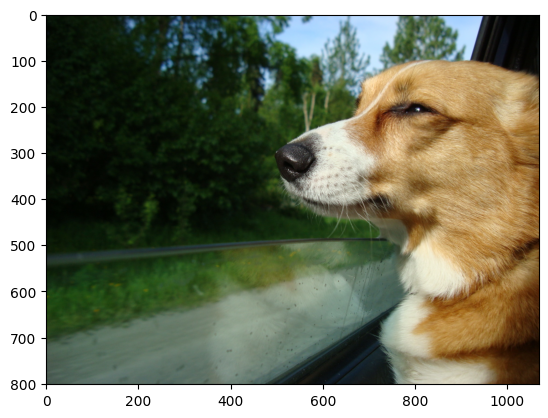

In [11]:
# В Colab/Linux это можно сделать через утилиту wget
!wget -O corgi.jpg https://farm4.staticflickr.com/1301/4694470234_6f27a4f602_o.jpg

from PIL import Image
from matplotlib import pyplot as plt

img = Image.open('corgi.jpg');
plt.imshow(img);

In [6]:
# Определение трансформаций для изображения
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Загрузка и предобработка изображения
img_path = '/content/drive/MyDrive/Colab Notebooks/Transfer_learning/hw_1_tr/corgi.jpg'  # путь к изображению
img = Image.open(img_path)
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)  # Добавление batch dimension


Предсказание класса изображения

In [13]:
# Шаг 5: Получение предсказания
with torch.no_grad():
    output = model(img_tensor)

# Получение предсказанного класса и его названия
_, predicted_class_idx = output.max(1)
predicted_class_idx = predicted_class_idx.item()
predicted_class_name = labels[predicted_class_idx]

print(f"Predicted class index: {predicted_class_idx}")
print(f"Predicted class name: {predicted_class_name}")

Predicted class index: 263
Predicted class name: Pembroke


##Задание №2.
Скачать нейросеть BERT для лингвистических задач и реализовать процедуру классификации текстов (без оглядки на качество классификации)

Установка необходимых библиотек

In [14]:
!pip install transformers torch

Загрузка модели BERT и токенизатора для текстов на русском языке

In [18]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Загрузка токенизатора и модели BERT для русского языка
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')
model = BertForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased', num_labels=2)
model.eval()

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

Предобработка текста

In [20]:
# Пример текстов для классификации
texts = ["Я люблю программировать на Питоне!", "Я ненавижу делать домашние задания."]

# Токенизация и преобразование текстов в тензоры
inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)

Выполнение классификации текста

In [21]:
# Получение предсказаний
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Преобразование логитов в вероятности
probabilities = torch.softmax(logits, dim=-1)

# Получение меток предсказанных классов
predicted_class_indices = torch.argmax(probabilities, dim=-1)

# Определение меток классов
class_labels = ['Негативный', 'Позитивный']  # Пример для бинарной классификации (негативный/позитивный)

# Получение названий предсказанных классов
predicted_class_names = [class_labels[idx] for idx in predicted_class_indices]

# Вывод результатов
for text, label in zip(texts, predicted_class_names):
    print(f"Text: {text}\nPredicted class: {label}\n")

Text: Я люблю программировать на Питоне!
Predicted class: Позитивный

Text: Я ненавижу делать домашние задания.
Predicted class: Негативный

